In [20]:
import scipy
import bagpy
import numpy as np
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib import rc
import statistics
import regex as re
from transforms3d.quaternions import quat2mat

In [8]:
def get_topics(b):
    csv_files = []
    for topic in b.topics:
        #print(topic)
        data = b.message_by_topic(topic)
        csv_files.append(data)
    return csv_files


In [9]:
bag = "./kalib_test.bag"
b = bagreader(bag)
csv_files = get_topics(b)
print(csv_files)

[INFO]  Data folder ./kalib_test already exists. Not creating.
['./kalib_test/kalipen-joy.csv', './kalib_test/rosout.csv', './kalib_test/rosout_agg.csv', './kalib_test/tf.csv', './kalib_test/vrpn_client_node-Kalipen-pose.csv']


In [10]:
captured_poses = pd.read_csv(csv_files[-1])
print(captured_poses)

              Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0     1.710769e+09      538498         1710768809            34123906   
1     1.710769e+09      538499         1710768809            44120004   
2     1.710769e+09      538500         1710768809            54247646   
3     1.710769e+09      538501         1710768809            64280515   
4     1.710769e+09      538502         1710768809            74246125   
...            ...         ...                ...                 ...   
1190  1.710769e+09      539688         1710768818           954189089   
1191  1.710769e+09      539689         1710768818           964210236   
1192  1.710769e+09      539690         1710768818           974191492   
1193  1.710769e+09      539691         1710768818           984151182   
1194  1.710769e+09      539692         1710768818           984193481   

     header.frame_id  pose.position.x  pose.position.y  pose.position.z  \
0              world         0.026953        -0.

In [50]:
#print(captured_poses['pose.orientation.x'])
#print(captured_poses['pose.orientation.y'])
#print(captured_poses['pose.orientation.z'])
#print(captured_poses['pose.orientation.w'])

qx = captured_poses['pose.orientation.x'].tolist()
qy = captured_poses['pose.orientation.y'].tolist()
qz = captured_poses['pose.orientation.z'].tolist()
qw = captured_poses['pose.orientation.w'].tolist()
x = captured_poses['pose.position.x'].tolist()
y = captured_poses['pose.position.y'].tolist()
z = captured_poses['pose.position.z'].tolist()

q = np.array([qw, qx, qy, qz])

def createT(q, p): 
    
    R = quat2mat(q)
    T = np.hstack((R, p.reshape(3, 1)))
    T = np.vstack((T, np.array([0, 0, 0, 1]).reshape(1, 4)))
    
    return T

T_ = []
for qx_, qy_, qz_, qw_, x_, y_, z_ in zip(qx, qy, qz, qw, x, y, z):
    q = np.array([qw_, qx_, qy_, qz_])
    p = np.array([x_, y_, z_])
    T_.append(createT(q, p)) 

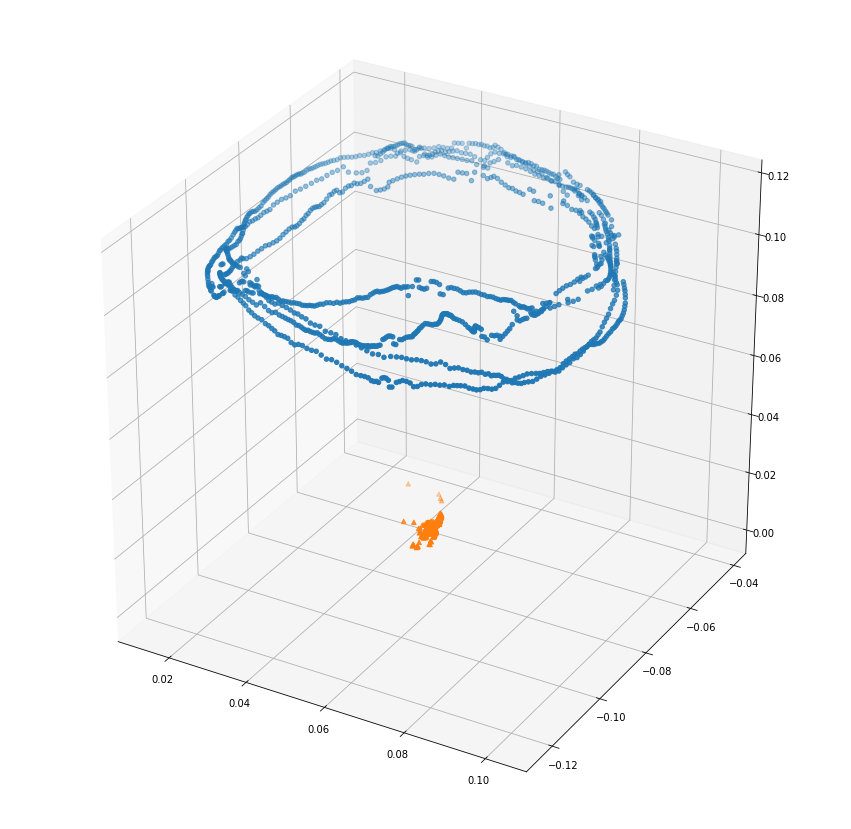

In [65]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_, y_, z_, marker='o')
ax.scatter(xT_, yT_, zT_, marker='^')

In [62]:
# Prikupljene tocke
x_ = [T[0, 3] for T in T_]
y_ = [T[1, 3] for T in T_]
z_ = [T[2, 3] for T in T_]

# Kalibrirane tocke
xT_ = [tfT[0, 3] for tfT in transfT]
yT_ = [tfT[1, 3] for tfT in transfT]
zT_ = [tfT[2, 3] for tfT in transfT]

T_init = np.array([[1, 0, 0, -0.01331904], 
                  [0, 1, 0, 0.0374956], 
                  [0, 0, 1, -0.10462651], 
                  [0, 0, 0, 1]])


In [61]:
transfT = [np.matmul(T, T_init) for T in T_]